In [13]:

# New addition
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
df = pd.read_csv('cleveland.csv')
df.rename(columns={'num': 'disease'}, inplace=True)
df['disease'] = df.disease.apply(lambda x: min(x, 1))
df.loc[df['ca'] == '?', 'ca'] = None
df.loc[df['thal'] == '?', 'thal'] = None
df['ca'] = df['ca'].apply(lambda a: float(a) if (a is not None) else None)
df['thal'] = df['thal'].apply(lambda a: float(a) if (a is not None) else None)
display(df)
df.dropna().corr()
def testDataset(dataframe, testCol, k=5, attributes=1, verbose=True):
    df = dataframe.copy()

    # Test a random set of attributes
    if type(attributes) == int:
        # If more attributes are specified than there are, just use all of them
        if attributes > len(df.columns)-1:
            attributes = len(df.columns)-1
        attributes = df[df.columns[df.columns != testCol]].sample(axis=1, n=attributes).columns

    # Test a specific set of attributes
    elif type(attributes) != list:
        print('attributes must be an integer or a list of attribute names')
        return


    # Clear out any records that don't have a valid value for one of the attributes in question
    for attribute in attributes:
        if attribute == testCol:
            print(f'Cannot predict {testCol} using {testCol}')
            return
        
        try:
            df = df.dropna(subset=attribute)
        except Exception as e:
            print(e)
            return
    
    print(f'Predicting based on the {k} nearest neighbors using {attributes}:') if verbose else None
    # display(df)

    # Standardize the data
    for attribute in attributes:
        df[attribute] = (df[attribute] - df[attribute].mean()) / df[attribute].std()

    f1Scores = []
    for j in range(10):
        # Use knn. First create a nearest neighbors object.
        nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')
        
        X = df[attributes].values
        y = df[[testCol]].values

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

        fit = nn.fit(X_train)

        distances, indices = fit.kneighbors(X_test)
        
        y_pred = []
        for i in range(len(indices)):
            nbrs = y_train[indices[i]]
            

            # Predict the class with the highest frequency among neighbors
            greatestValue = df[testCol].unique()[0]

            greatestValueCount = 0
            for value in df[testCol].unique():
                valueCount = [item for sublist in nbrs for item in sublist].count(value)

                if valueCount >= greatestValueCount:
                    greatestValueCount = valueCount
                    greatestValue = value

            # healthy = [item for sublist in nbrs for item in sublist].count(0)
            # sick = [item for sublist in nbrs for item in sublist].count(1)
            predict = greatestValue
            # print(healthy, sick, predict)

            y_pred.append(predict)
        
        (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, zero_division = 0)
        f1Scores.append(f)
        print(f'Test {j}: precision={p}, recall={r}, f-score={f}, support={s}') if verbose else None

    meanF1s = []
    for i in range(len(f1Scores[0])):
        f1Total = 0
        for score in f1Scores:
            f1Total += score[i]
        meanF1s.append(f1Total / len(f1Scores))

    print(f'Mean F1 scores: f-score={meanF1s}') if verbose else None

    f1sTotal = 0
    for f1 in meanF1s:
        f1sTotal += f1
    meanOfF1s = f1sTotal / len(meanF1s)
    meanF1s.append(meanOfF1s)

    print(f'Mean of mean F1 scores: f-score={meanF1s[-1]}') if verbose else None

    return meanF1s, attributes

age = 'age'
trestbps = 'trestbps'
chol = 'chol'
thalach = 'thalach'
cp = 'cp'
restecg = 'restecg'
# scores = {'k': [], 'scores': []}
# for k in range(1, 200):
#     scores['k'].append(k)
#     scores['scores'].append(testDataset(dataframe=df, testCol='disease', k=k, attributes=['oldpeak', 'cp'], verbose=False))

# plt.plot(scores['k'], scores['scores'])
# plt.xlabel('k')
# plt.ylabel('f score')
display(testDataset(df, 'disease', 5, ['oldpeak', 'thal', 'ca']))
testDataset(df, 'disease', 5, ['thalach', 'ca', 'thal'])
testDataset(df, 'disease', 5, ['oldpeak', 'age', 'cp'])
testDataset(df, 'disease', 5, ['slope', 'thal', 'cp'])
display(testDataset(df, 'disease', 5, [trestbps, chol,thalach,cp]))

#testDataset(df, 'disease', 5, 4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Predicting based on the 5 nearest neighbors using ['oldpeak', 'thal', 'ca']:
Test 0: precision=[0.7804878  0.79411765], recall=[0.82051282 0.75      ], f-score=[0.8        0.77142857], support=[39 36]
Test 1: precision=[0.79591837 0.88461538], recall=[0.92857143 0.6969697 ], f-score=[0.85714286 0.77966102], support=[42 33]
Test 2: precision=[0.80952381 0.78787879], recall=[0.82926829 0.76470588], f-score=[0.81927711 0.7761194 ], support=[41 34]
Test 3: precision=[0.78571429 0.75757576], recall=[0.80487805 0.73529412], f-score=[0.79518072 0.74626866], support=[41 34]
Test 4: precision=[0.84444444 0.8       ], recall=[0.86363636 0.77419355], f-score=[0.85393258 0.78688525], support=[44 31]
Test 5: precision=[0.78378378 0.89473684], recall=[0.87878788 0.80952381], f-score=[0.82857143 0.85      ], support=[33 42]
Test 6: precision=[0.76595745 0.85714286], recall=[0.9        0.68571429], f-score=[0.82758621 0.76190476], support=[40 35]
Test 7: precision=[0.79545455 0.77419355], recall=[0.83

([0.8221506906161334, 0.7686780367750023, 0.795414363695568],
 ['oldpeak', 'thal', 'ca'])

Predicting based on the 5 nearest neighbors using ['thalach', 'ca', 'thal']:
Test 0: precision=[0.81578947 0.75675676], recall=[0.775 0.8  ], f-score=[0.79487179 0.77777778], support=[40 35]
Test 1: precision=[0.79069767 0.84375   ], recall=[0.87179487 0.75      ], f-score=[0.82926829 0.79411765], support=[39 36]
Test 2: precision=[0.7826087  0.89655172], recall=[0.92307692 0.72222222], f-score=[0.84705882 0.8       ], support=[39 36]
Test 3: precision=[0.69767442 0.78125   ], recall=[0.81081081 0.65789474], f-score=[0.75       0.71428571], support=[37 38]
Test 4: precision=[0.76470588 0.80487805], recall=[0.76470588 0.80487805], f-score=[0.76470588 0.80487805], support=[34 41]
Test 5: precision=[0.72916667 0.77777778], recall=[0.85365854 0.61764706], f-score=[0.78651685 0.68852459], support=[41 34]
Test 6: precision=[0.73469388 0.84615385], recall=[0.9        0.62857143], f-score=[0.80898876 0.72131148], support=[40 35]
Test 7: precision=[0.77777778 0.73333333], recall=[0.81395349 0.6

([0.7272072627382764, 0.6799293779196867, 0.7035683203289815],
 ['trestbps', 'chol', 'thalach', 'cp'])

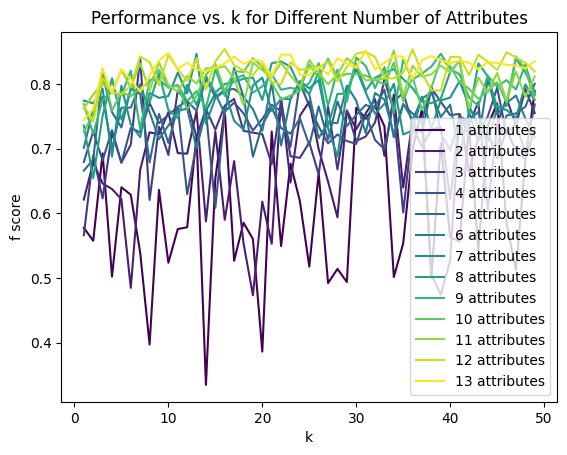

[49, 34, 7, 24, 3, 17, 13, 47, 39, 47, 34, 16, 31]

[0.7889203159398694,
 0.783578652225801,
 0.8405275146679401,
 0.8015141556413833,
 0.8135528281375499,
 0.8245650078179403,
 0.8464671932335994,
 0.8393151505715921,
 0.8465281890682831,
 0.8426447220787059,
 0.8518209106229557,
 0.854034558802759,
 0.8516143470927533]

[Index(['thal'], dtype='object'),
 Index(['thalach', 'ca'], dtype='object'),
 Index(['sex', 'cp', 'oldpeak'], dtype='object'),
 Index(['chol', 'thal', 'slope', 'restecg'], dtype='object'),
 Index(['thal', 'ca', 'oldpeak', 'age', 'fbs'], dtype='object'),
 Index(['age', 'oldpeak', 'sex', 'slope', 'fbs', 'chol'], dtype='object'),
 Index(['chol', 'age', 'exang', 'oldpeak', 'sex', 'thalach', 'slope'], dtype='object'),
 Index(['trestbps', 'thalach', 'age', 'fbs', 'sex', 'cp', 'exang', 'ca'], dtype='object'),
 Index(['fbs', 'oldpeak', 'slope', 'thalach', 'sex', 'age', 'exang', 'thal',
        'trestbps'],
       dtype='object'),
 Index(['exang', 'oldpeak', 'slope', 'trestbps', 'age', 'thalach', 'chol', 'cp',
        'fbs', 'thal'],
       dtype='object'),
 Index(['thal', 'age', 'trestbps', 'fbs', 'ca', 'sex', 'exang', 'slope',
        'thalach', 'restecg', 'cp'],
       dtype='object'),
 Index(['oldpeak', 'trestbps', 'restecg', 'exang', 'thalach', 'thal', 'slope',
        'sex', 'age', 'fbs',

In [14]:
from matplotlib.cm import viridis
import numpy as np

num_attributes = 13

# Create a color map
colors = viridis(np.linspace(0, 1, num_attributes))
highestKs = []
highestFScores = []
bestAttributes = []
# Plot each curve with a different color based on the number of attributes
for j in range(1, num_attributes + 1):
    scores = {'k': [], 'scores': [], 'attributes': []}
    highestFScore = 0
    highestK = 0
    bestAttribute = []
    for k in range(1, 50):
        scores['k'].append(k)
        new_scores, randomAttributes = testDataset(dataframe=df, testCol='disease', k=k, attributes=j, verbose=False)
        scores['scores'].append(new_scores[2])

        if highestFScore < new_scores[2]:
            highestFScore = new_scores[2]
            highestK = k
            bestAttribute = randomAttributes

    # Use a different color for each curve
    plt.plot(scores['k'], scores['scores'], label=f"{j} attributes", color=colors[j-1])
    highestKs.append(highestK)
    highestFScores.append(highestFScore)
    bestAttributes.append(randomAttributes)
    



plt.xlabel('k')
plt.ylabel('f score')
plt.title('Performance vs. k for Different Number of Attributes')
plt.legend()
plt.show()


display(highestKs)
display(highestFScores)
display(bestAttributes)







In [15]:

max_value = max(highestFScores)
index_of_max = highestFScores.index(max_value)


display(testDataset(df, 'disease', highestKs[index_of_max], list(bestAttributes[index_of_max])))

Predicting based on the 16 nearest neighbors using ['oldpeak', 'trestbps', 'restecg', 'exang', 'thalach', 'thal', 'slope', 'sex', 'age', 'fbs', 'cp', 'chol']:
Test 0: precision=[0.81081081 0.76923077], recall=[0.76923077 0.81081081], f-score=[0.78947368 0.78947368], support=[39 37]
Test 1: precision=[0.8        0.84615385], recall=[0.90909091 0.6875    ], f-score=[0.85106383 0.75862069], support=[44 32]
Test 2: precision=[0.78431373 0.84      ], recall=[0.90909091 0.65625   ], f-score=[0.84210526 0.73684211], support=[44 32]
Test 3: precision=[0.84444444 0.77419355], recall=[0.84444444 0.77419355], f-score=[0.84444444 0.77419355], support=[45 31]
Test 4: precision=[0.81578947 0.78947368], recall=[0.79487179 0.81081081], f-score=[0.80519481 0.8       ], support=[39 37]
Test 5: precision=[0.86046512 0.78787879], recall=[0.84090909 0.8125    ], f-score=[0.85057471 0.8       ], support=[44 32]
Test 6: precision=[0.82608696 0.76666667], recall=[0.84444444 0.74193548], f-score=[0.83516484 0.

([0.8256096909230477, 0.7630935209652097, 0.7943516059441287],
 ['oldpeak',
  'trestbps',
  'restecg',
  'exang',
  'thalach',
  'thal',
  'slope',
  'sex',
  'age',
  'fbs',
  'cp',
  'chol'])

Given the results of the test we ran, we are 'usually' around 10 or 11 attributes, so hand select that many. It is also between 20 and 35 K values 'usually', so use that many.

In [16]:
attributesToTest = ['age', 'sex','cp','trestbps','chol','fbs','restecg','ca','oldpeak','exang','thal']
display(testDataset(df, 'disease', 25, attributesToTest))

Predicting based on the 25 nearest neighbors using ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'ca', 'oldpeak', 'exang', 'thal']:
Test 0: precision=[0.78431373 0.875     ], recall=[0.93023256 0.65625   ], f-score=[0.85106383 0.75      ], support=[43 32]
Test 1: precision=[0.77272727 0.83870968], recall=[0.87179487 0.72222222], f-score=[0.81927711 0.7761194 ], support=[39 36]
Test 2: precision=[0.87179487 0.80555556], recall=[0.82926829 0.85294118], f-score=[0.85       0.82857143], support=[41 34]
Test 3: precision=[0.88235294 0.875     ], recall=[0.9375     0.77777778], f-score=[0.90909091 0.82352941], support=[48 27]
Test 4: precision=[0.7826087  0.72413793], recall=[0.81818182 0.67741935], f-score=[0.8 0.7], support=[44 31]
Test 5: precision=[0.85714286 0.84615385], recall=[0.91304348 0.75862069], f-score=[0.88421053 0.8       ], support=[46 29]
Test 6: precision=[0.87804878 0.91176471], recall=[0.92307692 0.86111111], f-score=[0.9        0.88571429], support=[39 36]
T

([0.8651273035648573, 0.8078889663631704, 0.8365081349640139],
 ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'ca',
  'oldpeak',
  'exang',
  'thal'])

In [17]:
# attributesToTest = ['age', 'sex','cp','trestbps','chol','fbs','restecg','ca','oldpeak','exang','thal_3.0','thal_6.0','thal_7.0']
# display(df)

# display(testDataset(df, 'disease', 25, attributesToTest))

In [18]:
def challenge(testDataFrame, trainDataFrame, testCol, k=5, attributes=1, verbose=True):
    testDF = testDataFrame.copy()
    trainDF = trainDataFrame.copy()

    # Test a random set of attributes
    if type(attributes) == int:
        # If more attributes are specified than there are, just use all of them
        if attributes > len(testDF.columns)-1:
            attributes = len(testDF.columns)-1
        attributes = testDF[testDF.columns[testDF.columns != testCol]].sample(axis=1, n=attributes).columns

    # Test a specific set of attributes
    elif type(attributes) != list:
        print('attributes must be an integer or a list of attribute names')
        return


    # Clear out any records that don't have a valid value for one of the attributes in question
    for attribute in attributes:
        if attribute == testCol:
            print(f'Cannot predict {testCol} using {testCol}')
            return
        
        try:
            testDF = testDF.dropna(subset=attribute)
            trainDF = trainDF.dropna(subset=attribute)
        except Exception as e:
            print(e)
            return
    
    print(f'Predicting based on the {k} nearest neighbors using {attributes}:') if verbose else None
    # display(testDF)

    # Standardize the data
    for attribute in attributes:
        testDF[attribute] = (testDF[attribute] - testDF[attribute].mean()) / testDF[attribute].std()
        trainDF[attribute] = (trainDF[attribute] - trainDF[attribute].mean()) / trainDF[attribute].std()
    
    # Use knn. First create a nearest neighbors object.
    nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')
    
    X_train = trainDF[attributes].values
    X_test = testDF[attributes].values
    y_train = trainDF[[testCol]].values
    y_test = testDF[[testCol]].values

    fit = nn.fit(X_train)

    distances, indices = fit.kneighbors(X_test)
    
    y_pred = []
    for i in range(len(indices)):
        nbrs = y_train[indices[i]]
        

        # Predict the class with the highest frequency among neighbors
        greatestValue = trainDF[testCol].unique()[0]

        greatestValueCount = 0
        for value in trainDF[testCol].unique():
            valueCount = [item for sublist in nbrs for item in sublist].count(value)

            if valueCount >= greatestValueCount:
                greatestValueCount = valueCount
                greatestValue = value

        # healthy = [item for sublist in nbrs for item in sublist].count(0)
        # sick = [item for sublist in nbrs for item in sublist].count(1)
        predict = greatestValue
        # print(healthy, sick, predict)

        y_pred.append(predict)
        
    (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, zero_division = 0)
    print(f'precision={p}, recall={r}, f-score={f}, support={s}') if verbose else None

    f1Total = 0
    for f1 in f:
        f1Total += f1
    meanF1 = f1Total / len(f)

    print(f'Mean of F1 scores: f-score={meanF1}') if verbose else None
    
    f1Scores = f.tolist()
    f1Scores.append(meanF1)

    return f1Scores, attributes

In [19]:
# challengeDataset = 'cleveland-test-sample.csv'
# challengeDF = pd.read_csv(challengeDataset)
# challengeDF.rename(columns={'num': 'disease'}, inplace=True)
# challengeDF['disease'] = challengeDF.disease.apply(lambda x: min(x, 1))
# challengeDF.loc[challengeDF['ca'] == '?', 'ca'] = None
# challengeDF.loc[challengeDF['thal'] == '?', 'thal'] = None
# challengeDF['ca'] = challengeDF['ca'].apply(lambda a: float(a) if (a is not None) else None)
# challengeDF['thal'] = challengeDF['thal'].apply(lambda a: float(a) if (a is not None) else None)
# display(challengeDF)

In [20]:
# attributesToTest = ['age', 'sex','cp','trestbps','chol','fbs','restecg','ca','oldpeak','exang','thal']
# k = 25
# display(challenge(testDataFrame=challengeDF, trainDataFrame=df, testCol='disease', k=k, attributes=attributesToTest, verbose=True))

In [21]:
bcDF = pd.read_csv('breast-cancer-wisconsin.data', names=['id', 'clump_thickness', 'cell_size_unif', 'cell_shape_unif', 'marginal_adhesion', 's_ep_cell_size', 'bare_nuclei', 'bland_chromatim', 'normal_nucleoli', 'mitoses', 'class'])
bcDF.loc[bcDF['bare_nuclei'] == '?', 'bare_nuclei'] = None
bcDF['bare_nuclei'] = bcDF['bare_nuclei'].apply(lambda a: int(a) if (a is not None) else None)
bcDF = bcDF.drop('id', axis=1)
for attribute in bcDF:
    print(bcDF[attribute].unique())
display(bcDF)

[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
[ 1. 10.  2.  4.  3.  9.  7. nan  5.  8.  6.]
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[2 4]


,clump_thickness,cell_size_unif,cell_shape_unif,marginal_adhesion,s_ep_cell_size,bare_nuclei,bland_chromatim,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


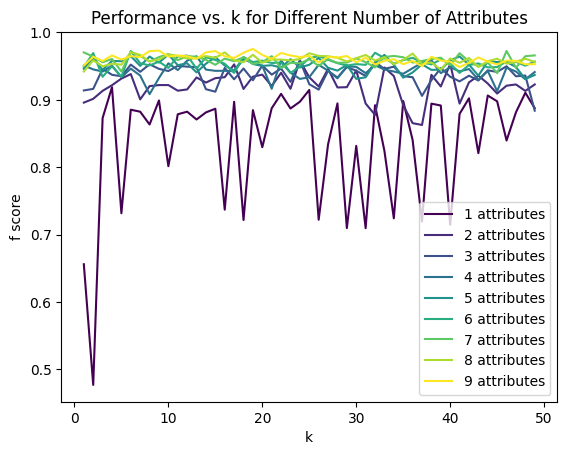

[4, 24, 24, 13, 10, 6, 46, 6, 19]

[0.9188068354650154,
 0.9581644066848725,
 0.9587522495491965,
 0.9646618598533001,
 0.9672785501571206,
 0.9724418820131175,
 0.9725169567607882,
 0.9706297856301432,
 0.9755594414461892]

[Index(['bland_chromatim'], dtype='object'),
 Index(['bare_nuclei', 'marginal_adhesion'], dtype='object'),
 Index(['mitoses', 's_ep_cell_size', 'normal_nucleoli'], dtype='object'),
 Index(['cell_shape_unif', 'marginal_adhesion', 's_ep_cell_size',
        'normal_nucleoli'],
       dtype='object'),
 Index(['s_ep_cell_size', 'cell_size_unif', 'mitoses', 'normal_nucleoli',
        'bland_chromatim'],
       dtype='object'),
 Index(['mitoses', 'bland_chromatim', 'clump_thickness', 'cell_shape_unif',
        'cell_size_unif', 'normal_nucleoli'],
       dtype='object'),
 Index(['clump_thickness', 's_ep_cell_size', 'cell_shape_unif', 'mitoses',
        'normal_nucleoli', 'cell_size_unif', 'bare_nuclei'],
       dtype='object'),
 Index(['clump_thickness', 'marginal_adhesion', 'normal_nucleoli',
        'bland_chromatim', 'cell_size_unif', 'mitoses', 'bare_nuclei',
        's_ep_cell_size'],
       dtype='object'),
 Index(['mitoses', 'marginal_adhesion', 'cell_shape_unif', 's_ep_cell_size',
   

In [22]:
num_attributes = 9

# Create a color map
colors = viridis(np.linspace(0, 1, num_attributes))
highestKs = []
highestFScores = []
bestAttributes = []
# Plot each curve with a different color based on the number of attributes
for j in range(1, num_attributes + 1):
    scores = {'k': [], 'scores': [], 'attributes': []}
    highestFScore = 0
    highestK = 0
    bestAttribute = []
    for k in range(1, 50):
        scores['k'].append(k)
        new_scores, randomAttributes = testDataset(dataframe=bcDF, testCol='class', k=k, attributes=j, verbose=False)
        scores['scores'].append(new_scores[2])

        if highestFScore < new_scores[2]:
            highestFScore = new_scores[2]
            highestK = k
            bestAttribute = randomAttributes

    # Use a different color for each curve
    plt.plot(scores['k'], scores['scores'], label=f"{j} attributes", color=colors[j-1])
    highestKs.append(highestK)
    highestFScores.append(highestFScore)
    bestAttributes.append(randomAttributes)
    



plt.xlabel('k')
plt.ylabel('f score')
plt.title('Performance vs. k for Different Number of Attributes')
plt.legend()
plt.show()


display(highestKs)
display(highestFScores)
display(bestAttributes)

In [23]:
scores = {'k': [], 'scores': [], 'attributes': []}
for k in range(5, 16):
    highestFScore = 0
    highestK = 0
    bestAttribute = []
    for i in range(20):
        new_scores, randomAttributes = testDataset(dataframe=bcDF, testCol='class', k=k, attributes=9, verbose=False)

        if highestFScore < new_scores[2]:
            highestFScore = new_scores[2]
            highestK = k
            bestAttribute = randomAttributes
    
    scores['k'].append(k)
    scores['scores'].append(highestFScore)
    scores['attributes'].append(bestAttribute)

display(scores['k'])
display(scores['scores'])
display(scores['attributes'])

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

[0.9712307794953965,
 0.9749767616568108,
 0.9732116942762896,
 0.9724205105888413,
 0.9704374363106626,
 0.9728648979289296,
 0.9742249253523522,
 0.971531762933832,
 0.9705908423118741,
 0.9735787109741301,
 0.970056237174266]

[Index(['bland_chromatim', 'bare_nuclei', 'mitoses', 'cell_size_unif',
        'clump_thickness', 's_ep_cell_size', 'cell_shape_unif',
        'normal_nucleoli', 'marginal_adhesion'],
       dtype='object'),
 Index(['cell_size_unif', 'cell_shape_unif', 'bare_nuclei', 'clump_thickness',
        'marginal_adhesion', 's_ep_cell_size', 'normal_nucleoli',
        'bland_chromatim', 'mitoses'],
       dtype='object'),
 Index(['clump_thickness', 'bare_nuclei', 'bland_chromatim', 'cell_shape_unif',
        'cell_size_unif', 'marginal_adhesion', 's_ep_cell_size', 'mitoses',
        'normal_nucleoli'],
       dtype='object'),
 Index(['cell_size_unif', 'clump_thickness', 'bland_chromatim',
        'cell_shape_unif', 'normal_nucleoli', 's_ep_cell_size', 'mitoses',
        'bare_nuclei', 'marginal_adhesion'],
       dtype='object'),
 Index(['marginal_adhesion', 'bare_nuclei', 'cell_shape_unif',
        'bland_chromatim', 'cell_size_unif', 'mitoses', 'normal_nucleoli',
        's_ep_cell_size', 'clu

In [24]:
optimalAttributes = ['bland_chromatim', 'normal_nucleoli', 'bare_nuclei', 'clump_thickness', 's_ep_cell_size', 'marginal_adhesion', 'cell_size_unif', 'cell_shape_unif', 'mitoses']
optimalK = 8
testDataset(dataframe=bcDF, testCol='class', k=optimalK, attributes=optimalAttributes)

Predicting based on the 8 nearest neighbors using ['bland_chromatim', 'normal_nucleoli', 'bare_nuclei', 'clump_thickness', 's_ep_cell_size', 'marginal_adhesion', 'cell_size_unif', 'cell_shape_unif', 'mitoses']:
Test 0: precision=[0.97457627 0.98113208], recall=[0.99137931 0.94545455], f-score=[0.98290598 0.96296296], support=[116  55]
Test 1: precision=[0.98245614 0.9122807 ], recall=[0.95726496 0.96296296], f-score=[0.96969697 0.93693694], support=[117  54]
Test 2: precision=[0.98165138 0.93548387], recall=[0.96396396 0.96666667], f-score=[0.97272727 0.95081967], support=[111  60]
Test 3: precision=[0.98290598 0.87037037], recall=[0.94262295 0.95918367], f-score=[0.9623431  0.91262136], support=[122  49]
Test 4: precision=[0.98198198 0.96666667], recall=[0.98198198 0.96666667], f-score=[0.98198198 0.96666667], support=[111  60]
Test 5: precision=[0.98148148 0.92063492], recall=[0.95495495 0.96666667], f-score=[0.96803653 0.94308943], support=[111  60]
Test 6: precision=[0.97580645 1. 

([0.9777450277259216, 0.9543774260426042, 0.966061226884263],
 ['bland_chromatim',
  'normal_nucleoli',
  'bare_nuclei',
  'clump_thickness',
  's_ep_cell_size',
  'marginal_adhesion',
  'cell_size_unif',
  'cell_shape_unif',
  'mitoses'])